In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Open df mingextract_with_weather.csv
df = pd.read_csv('mingextract_with_weather.csv')

In [10]:
df

,type,price,location,date,time,weather,rain
0,bicycle,200,mesa nueva - cala,09/04/2022,04:30,65.1,0.0
1,bicycle,500,regents rd,09/05/2022,04:30,65.1,0.0
2,bicycle,330,sixth college,09/02/2022,13:00,68.8,0.0
3,scooter,1004,innovation ln foodworx,06/30/2022,20:00,67.4,0.0
4,scooter,1004,innovation ln foodworx,07/01/2022,21:00,69.7,0.0
...,...,...,...,...,...,...,...
2013,bicycle,1000,kaleidescope -,09/25/2020,17:30,66.7,0.0
2014,bicycle,1200,nuevo - tierra,09/28/2020,16:00,72.5,0.0
2015,bicycle,550,1 miramar st,09/24/2020,17:35,64.0,0.0
2016,bicycle,600,1 miramar street,09/29/2020,12:05,73.3,0.0


In [11]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

In [ ]:
#THe plot below shows the distribution of crimes vs temperature

/tmp/ipykernel_836672/3147357983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp_range'] = pd.cut(df['weather'], bins=temp_bins)


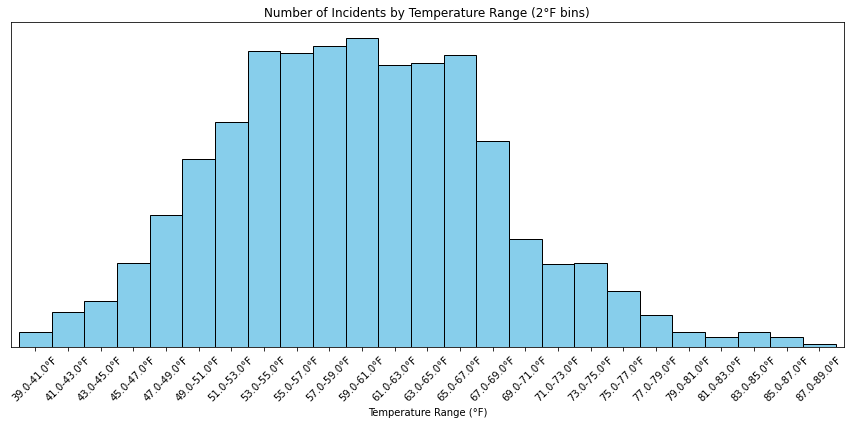

In [13]:
temp_min = df['weather'].min()
temp_max = df['weather'].max()
bin_width = 2
temp_bins = pd.interval_range(start=temp_min, end=temp_max + bin_width, freq=bin_width, closed='left')

df['temp_range'] = pd.cut(df['weather'], bins=temp_bins)
incident_counts = df['temp_range'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
incident_counts.plot(kind='bar', color='skyblue', edgecolor='black', width=1)  # Set width=1 to remove gaps
plt.title('Number of Incidents by Temperature Range (2°F bins)')
plt.xlabel('Temperature Range (°F)')

plt.yticks([])

plt.xticks(
    ticks=range(len(incident_counts.index)),
    labels=[f"{interval.left}-{interval.right}°F" for interval in incident_counts.index],
    rotation=45
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
#Below is the graph for weather data at UCSD sampled at random datetimes
#The random times are obtained by reshuffling the dates and times of origianl data independently and sampling the weather data from there

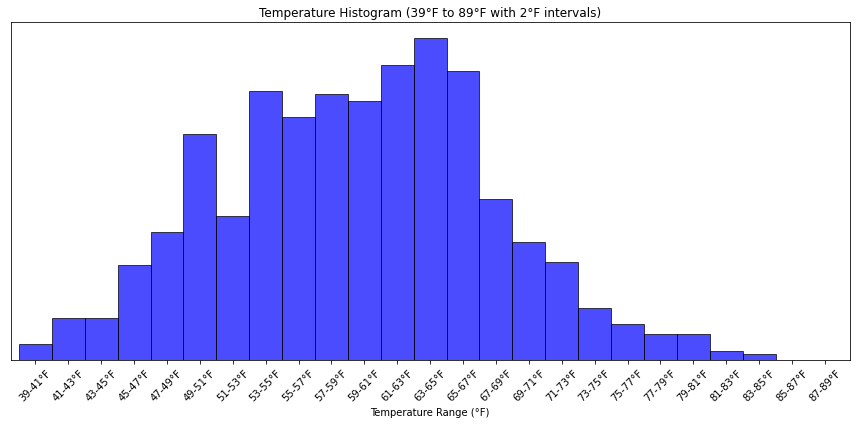

In [16]:
df = pd.read_csv('random_weather_data.csv')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
bin_edges = list(range(39, 91, 2))
df['temp_range'] = pd.cut(df['temperature'], bins=bin_edges)
temp_counts = df['temp_range'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
temp_counts.plot(kind='bar', color='blue', edgecolor='black', alpha=0.7, width=1.0)
plt.title('Temperature Histogram (39°F to 89°F with 2°F intervals)')
plt.xlabel('Temperature Range (°F)')
plt.xticks(
    ticks=range(len(temp_counts.index)),
    labels=[f"{int(interval.left)}-{int(interval.right)}°F" for interval in temp_counts.index],
    rotation=45
)
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#In conluclusion, the two graphs are similar and there does not seem to be a relationship between temperature and crime rate